<a href="https://colab.research.google.com/github/Varsha-dh/IEEE_prediction/blob/main/Eiii_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print("GPU Available:", torch.cuda.is_available())

GPU Available: True


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



   **Stratified sampling**


In [4]:
train_path="/content/drive/MyDrive/data_science/train_merged.csv"
train=pd.read_csv(train_path)

In [5]:
train.shape

(118108, 434)

In [6]:
#  for col in train.select_dtypes('float64').columns:
#         train[col] = train[col].astype('float32')

#  for col in train.select_dtypes('int64').columns:
#         train[col] = train[col].astype('int32')

#  for col in train.select_dtypes('object').columns:
#         train[col] = train[col].astype('category')




In [7]:
train.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo', 'isFraud'],
      dtype='object', length=434)

In [8]:
cat_col=['card1', 'card2', 'card3', 'card4', 'card5', 'card6','DeviceType', 'DeviceInfo','ProductCD','addr1','addr2','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9','id_12','id_13','id_14','id_15','id_16','id_17','id_18','id_19','id_20','id_21','id_22','id_23','id_24','id_25','id_26','id_27','id_28','id_29','id_30','id_31','id_32','id_33','id_34','id_35','id_36','id_37','id_38']



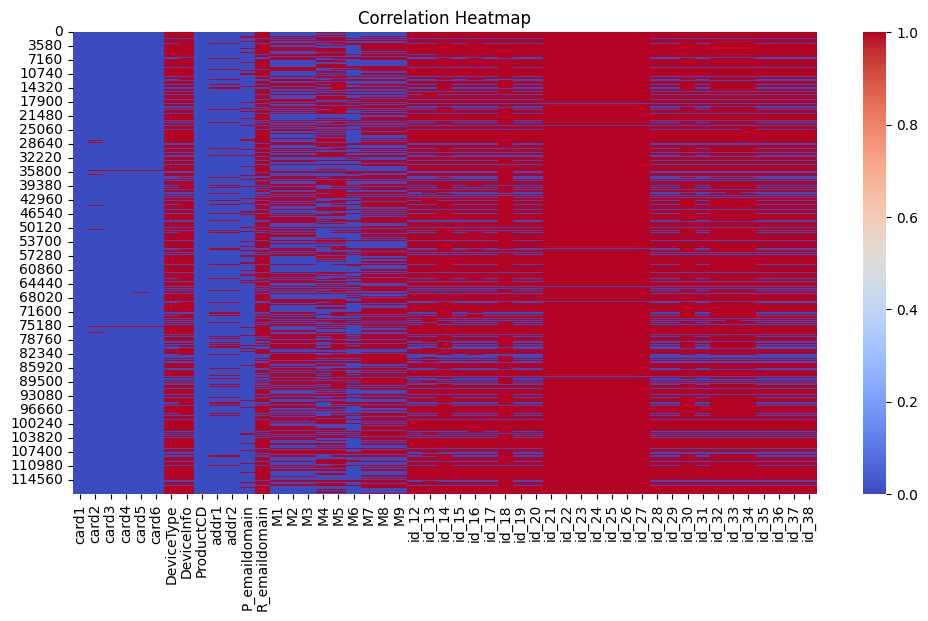

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(train[cat_col].isnull(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
num_col = [col for col in train.columns if col not in cat_col]


In [11]:
v_col=train.filter(like='v')

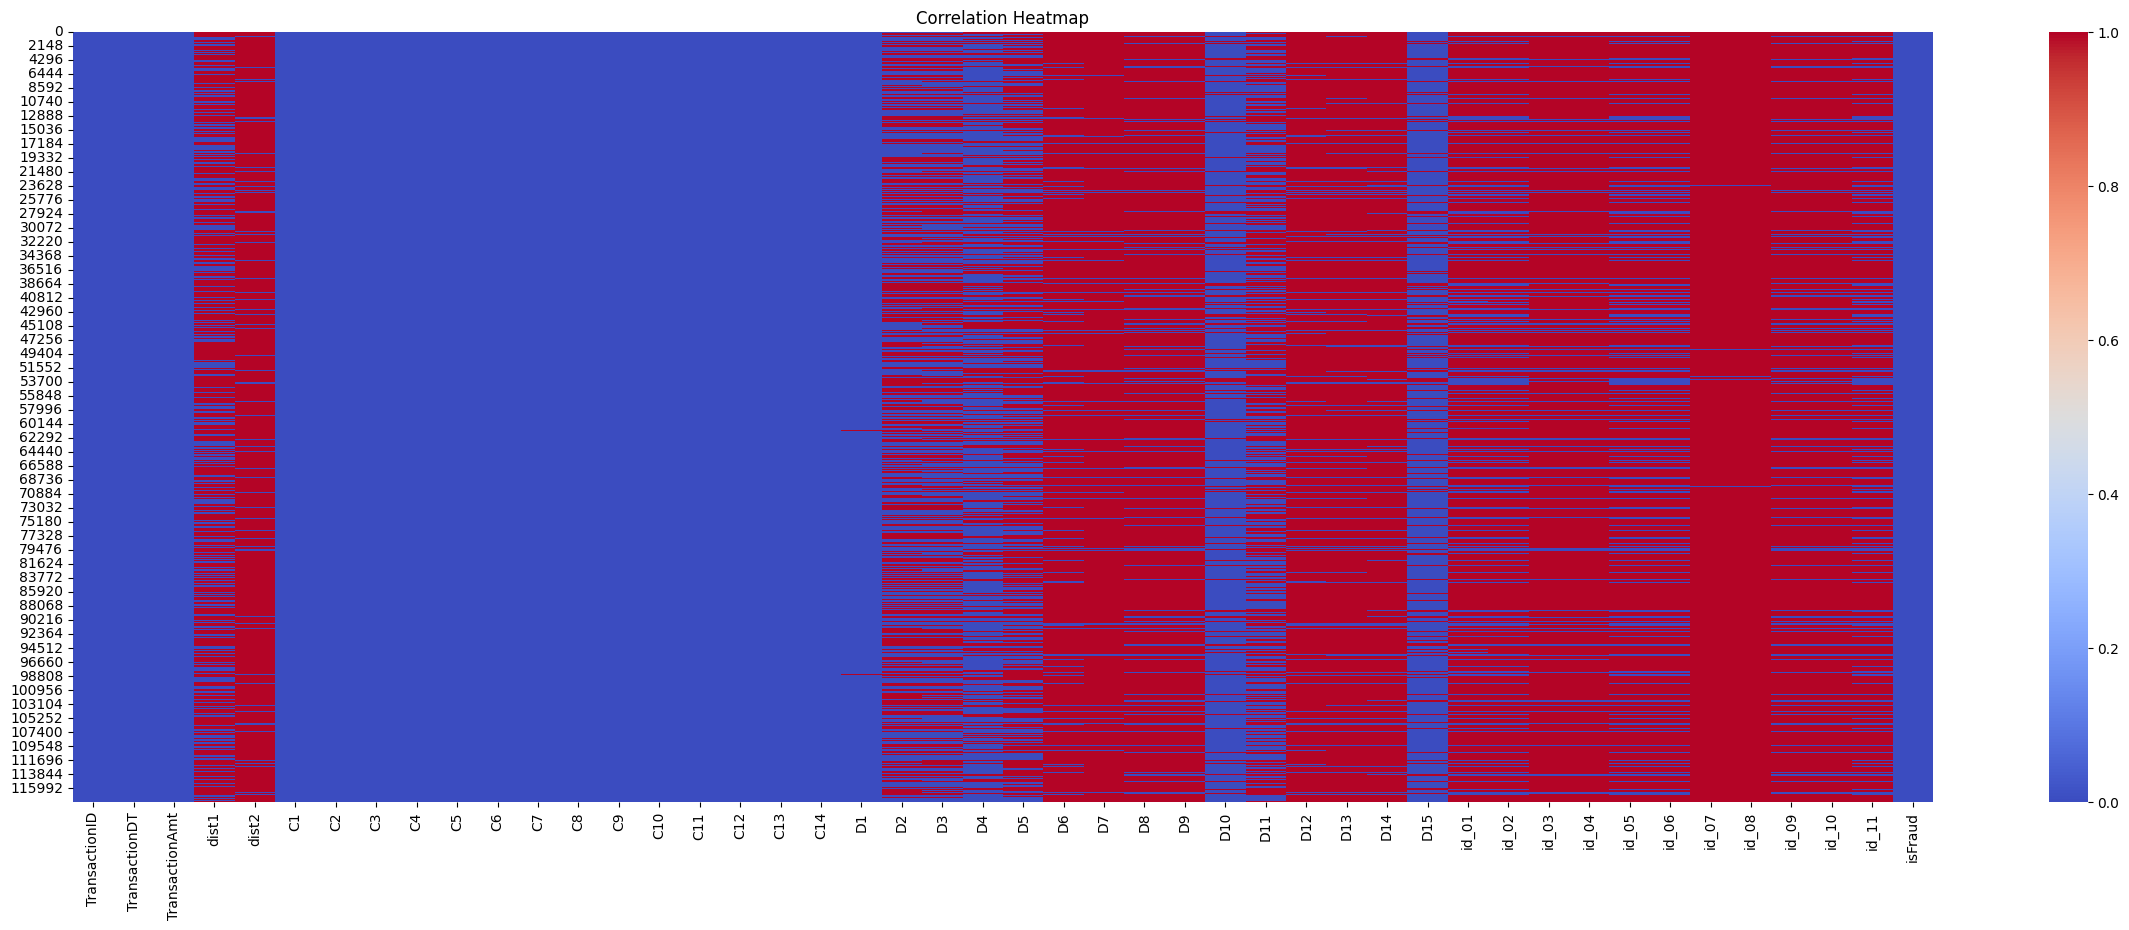

In [12]:

num_col = [col for col in train.columns if col not in cat_col]
num_ex_v=[col for col in num_col if not col.startswith('V')]
plt.figure(figsize=(30,10))
sns.heatmap(train[num_ex_v].isnull(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# plt.figure(figsize=(30, 10))
# sns.heatmap(train[v_col.columns].isnull(), cmap='coolwarm', cbar=False)

# plt.title('Missing Values Heatmap for V Columns')  # Corrected title
# plt.show()

In [14]:
(train.isnull().mean()*100).sort_values(ascending=False)


,0
id_24,99.188031
id_25,99.127917
id_07,99.127917
id_08,99.127917
id_21,99.126223
id_26,99.126223
id_27,99.124530
id_23,99.124530
id_22,99.124530
dist2,93.552511


In [15]:
train[cat_col] = train[cat_col].fillna('unknown')
train[num_col] = train[num_col].fillna(-1)


In [16]:
train.shape

(118108, 434)

In [17]:
  for col in train.select_dtypes('float64').columns:
        train[col] = train[col].astype('float32')

  for col in train.select_dtypes('int64').columns:
         train[col] = train[col].astype('int32')

  for col in train.select_dtypes('object').columns:
         train[col] = train[col].astype('category')




In [18]:
train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,3403931,10529396,61.950001,W,14223,382.0,150.0,visa,226.0,debit,204.0,87.0,-1.0,-1.0,gmail.com,unknown,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,0.0,0.0,-1.0,-1.0,-1.0,0.0,T,F,F,unknown,unknown,F,unknown,unknown,unknown,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.000000,-1.000000,-1.0,-1.0,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.

In [19]:
import pandas as pd
# import matplotlib.pyplot as plt


# # Convert seconds to hours
# train['hour'] = (train['TransactionDT'] % (3600 * 24)) / 3600  # Extract hour of the day

# # Plot distribution of transactions over 24 hours
# plt.hist(train['hour'], bins=24, edgecolor='black')
# plt.xlabel("Hour of the Day (UTC)")
# plt.ylabel("Transaction Count")
# plt.title("Transaction Distribution Over the Day")
# plt.show()


In [20]:


def make_day_feature(df, offset=0, tname='TransactionDT'):
    days = df[tname] / (3600 * 24)

    return days

def make_hour_feature(df, tname='TransactionDT'):
    hours = df[tname] / (3600)
    encoded_hours = np.floor(hours) % 24
    return encoded_hours


In [21]:
train['day'] = make_day_feature(train)
train['hour']= make_hour_feature(train)

<ipython-input-21-0561150d95b5>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['day'] = make_day_feature(train)
<ipython-input-21-0561150d95b5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['hour']= make_hour_feature(train)


In [22]:
train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud,day,hour
0,3403931,10529396,61.950001,W,14223,382.0,150.0,visa,226.0,debit,204.0,87.0,-1.0,-1.0,gmail.com,unknown,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,0.0,0.0,-1.0,-1.0,-1.0,0.0,T,F,F,unknown,unknown,F,unknown,unknown,unknown,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.000000,-1.000000,-1.0,-1.0,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0

In [23]:
### EDA

In [24]:
train[num_col].describe().loc[['mean', 'std']]

,TransactionID,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,isFraud
mean,3.282468e+06,7.376810e+06,134.735519,46.841511,14.349477,13.958284,15.139279,0.005224,4.021294,5.570469,8.985742,2.807888,5.075761,4.471670,5.178252,10.140710,4.021497,32.442619,8.242066,93.345268,87.578995,15.152640,99.551758,19.470198,7.661149,1.700469,17.864050,-0.800427,107.639397,76.311394,5.068505,0.915383,4.977842,138.479767,0.048777,0.072730,0.090155,-0.031869,-0.015621,0.072866,0.087479,0.063171,0.070419,-0.233591,-0.225522,0.357046,0.390600,0.740703,-0.022056,-0.021167,-0.012082,-0.010956,0.581188,0.608401,-0.015943,-0.013538,0.771125,0.791403,0.721687,0.730670,-0.128721,-0.128662,0.205862,0.221966,-0.005927,-0.004521,-0.014792,-0.007595,0.099172,0.125749,0.503895,0.544654,-0.167508,-0.160167,0.426169,-0.174307,-0.164883,0.485556,0.513115,0.442680,0.455168,-0.014275,-0.003776,-0.168422,-0.164553,-0.155857,0.370542,0.407364,0.795662,0.845895,-0.019042,-0.014910,-0.013572,-0.006968,0.589757,0.622777,-0.016790,-0.006951,0.737122,0.720527,0.735573,-0.130711,0.205964,0.221255,-0.008526,-0.004106,-0.009161,0.001058,0.30970,0.346530,0.772691,0.823924,-0.033622,-0.027864,-0.020549,0.566465,0.598359,-0.033715,-0.022335,0.751973,0.782318,0.696591,-0.150583,0.187608,0.203187,-0.022700,-0.018432,-0.034054,0.959486,2.909777,1.661682,0.061723,0.88977,0.271548,0.810352,1.740949,1.224938,0.085210,0.276450,0.162834,0.998713,1.003564,1.013818,1.006807,1.001676,1.004411,1.002506,1.008340,1.031776,1.014851,0.999517,1.000525,0.999856,1.000042,1.003590,1.000974,1.029981,1.092686,1.049421,120.777359,326.638702,197.384476,8.996922,91.828300,31.213545,94.413368,196.141586,139.797348,17.019285,38.189434,26.003786,-0.855454,-0.710689,-0.703424,-0.855378,-0.853659,0.212551,-0.360086,2.094049,-0.839113,-0.837454,-0.753658,-0.752066,36.257587,0.008670,0.414189,-0.755309,-0.754758,-0.753234,-0.751710,-0.746334,-0.743980,365.454254,6297.744629,-0.170884,0.122181,-0.064092,110.212234,295.129089,47.096622,0.081917,0.558379,-0.719934,-0.420141,-0.359882,-0.729942,-0.748916,-0.730975,-0.711239,-0.433205,-0.013259,0.719900,0.326938,-0.546203,-0.703729,-0.562782,-0.650176,-0.730315,-0.721153,-0.489696,-0.318928,-0.520778,-0.514910,-0.474024,-0.511506,-0.466886,-0.488722

normalization is requaired because most of  data is not around mean

In [25]:
# transation id

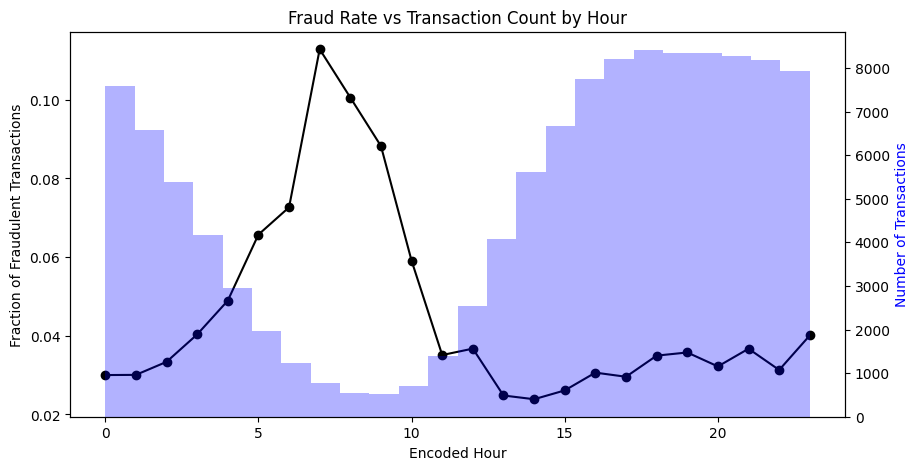

In [30]:

# Plot Fraud Rate by Hour
plt.figure(figsize=(10,5))
plt.plot(train.groupby('hour')['isFraud'].mean(), color='k', marker='o', linestyle='-')

# Create twin axis for histogram
ax = plt.gca()
ax2 = ax.twinx()

# Overlay histogram of transaction count
ax2.hist(train['hour'], alpha=0.3, bins=24, color='b')

# Labels
ax.set_xlabel('Encoded Hour')
ax.set_ylabel('Fraction of Fraudulent Transactions', color='k')
ax2.set_ylabel('Number of Transactions', color='b')

plt.title('Fraud Rate vs Transaction Count by Hour')
plt.show()


Wow! Clearly the time of day has a strong dependence on whether the transaction is fraudulent
Physically, the higher fraction of fraudulent transactions coincides with when there are a low number of transactions


In [31]:
# transactionAmt


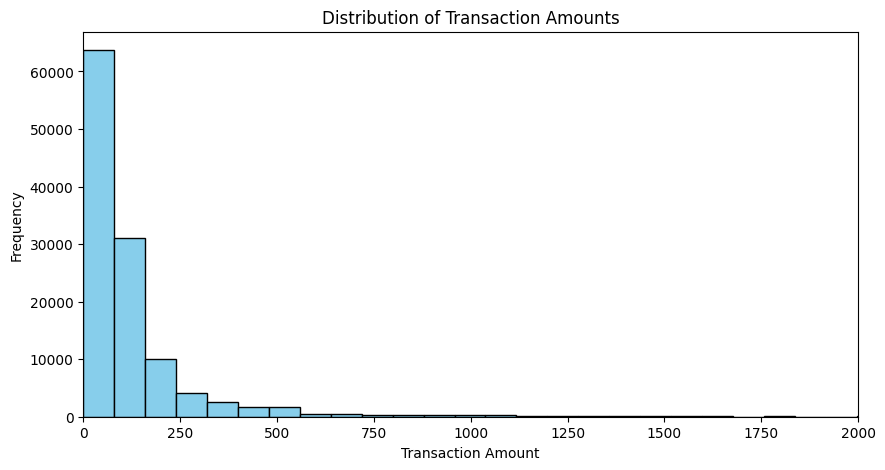

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.hist(train['TransactionAmt'], bins=400, color='skyblue', edgecolor='black')
plt.xlim(0,2000)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')

plt.show()

In [68]:
train["TransactionAmt"].min(), train["TransactionAmt"].max()


(0.2720000147819519, 31937.390625)

<ipython-input-72-d92f979789b2>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_binned = train.groupby('TransactionAmtBin')['isFraud'].mean()


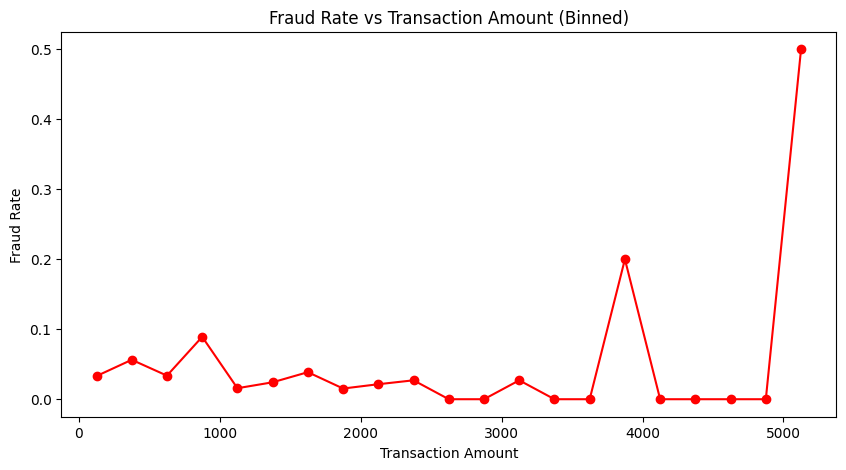

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(10, 5))

# Define transaction bins (e.g., every $100)
train['TransactionAmtBin'] = pd.cut(train['TransactionAmt'], bins=np.arange(0,6000,250))

# Compute fraud rate per bin
fraud_rate_binned = train.groupby('TransactionAmtBin')['isFraud'].mean()

# Convert bins to numeric values for plotting
bin_centers = [b.mid for b in fraud_rate_binned.index]

# Plot smoothed fraud rate
plt.plot(bin_centers, fraud_rate_binned.values, color='r', marker='o', linestyle='-')

# Labels and title
plt.xlabel('Transaction Amount')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate vs Transaction Amount (Binned)')

plt.show()




*  in the low to mid transaction range (up to $3500),the fraud rate
   fluctuates but mostly stays below 10%.
*  There is a noticeable peak around $4000, where the fraud rate rises
   significantly (~20%).
*  Fraud rate jumps to 50% at the highest transaction range.
* This suggests that high-value transactions might be flagged as
   fraudulent more often, possibly due to:

1.   Fraudulent high-value purchases

2.   Security measures catching suspicious high transactions
3.   Fewer total transactions at this level (which can exaggerate fraud rates)




